<a href="https://colab.research.google.com/github/allaberdi001/Pythonic-AI/blob/main/MNIST_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**************
(60000, 784)
(10000, 784)
Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.8997 - sparse_categorical_accuracy: 0.7027 - val_loss: 0.3208 - val_sparse_categorical_accuracy: 0.8950
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2615 - sparse_categorical_accuracy: 0.9177 - val_loss: 0.1986 - val_sparse_categorical_accuracy: 0.9488
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2193 - sparse_categorical_accuracy: 0.9316 - val_loss: 0.2014 - val_sparse_categorical_accuracy: 0.9425
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1936 - sparse_categorical_accuracy: 0.9416 - val_loss: 0.1751 - val_sparse_categorical_accuracy: 0.9463
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1805 - sparse_categorical_accuracy: 0.9442 - val_loss: 0.1066 - val_sparse_categorical_accuracy: 0.9681
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1416 - sparse_categorical_accuracy: 0.9573 - val_loss: 0.1180 - v

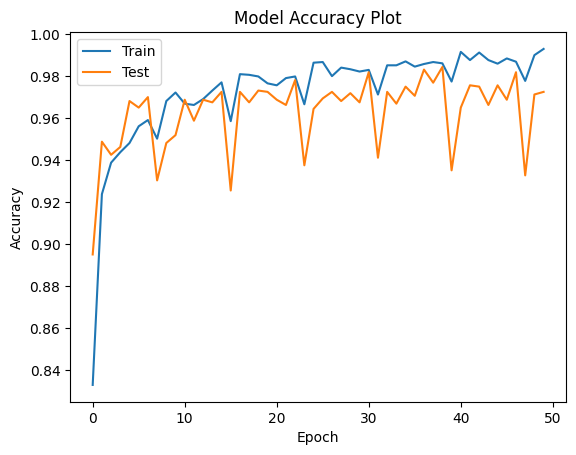

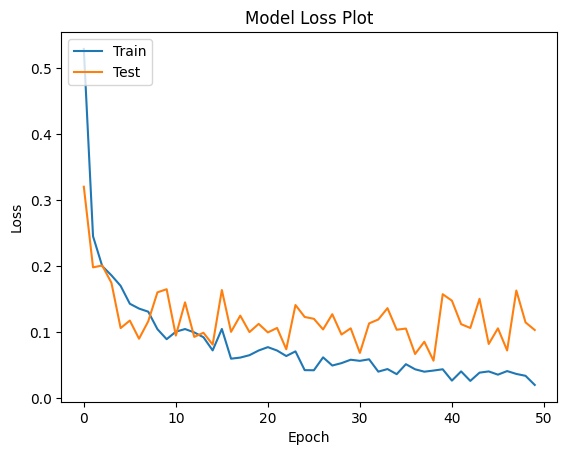

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#import data
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test)=mnist.load_data()
print('**************')
#flatten the images (28x28 becomes 784)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

# Min-Max normalization
x_train=x_train/255.0
x_test=x_test/255.0

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer((784,)))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

chkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath="./checkpoints/model_chkpoint.weights.h5",
    save_best_only=True,
    save_weights_only=True
)

history=model.fit(x_train,y_train,epochs=50,batch_size=32,steps_per_epoch=200,verbose=1,validation_steps=50,validation_split=0.2, callbacks=[chkpoint_callback],)
model.evaluate(x_test,y_test)

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#model loss plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

model.save("mnist_model")
model.load_weights("./checkpoints/model_chkpoint.weights.h5")
new_model=tf.keras.models.